## Libraries

In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from xgboost import XGBClassifier 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score

## Loading dataset

In [73]:
glass = pd.read_csv("glass.csv",names=["ID","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","type"])
target = glass["type"]
glass = glass.drop(["ID"], axis=1)
glass = glass.drop(["type"], axis=1)
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


## Missing values

In [74]:
print(glass.isnull().sum().sum())
print(target.isnull().sum())

0
0


## Data Visualization

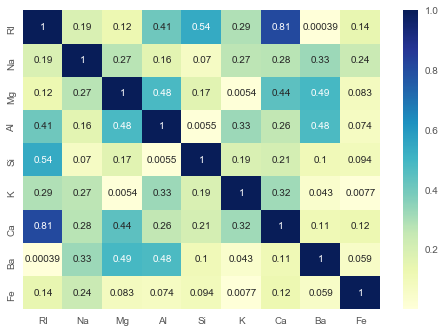

In [75]:
sns.heatmap(np.abs(glass.corr()), annot=True, cmap = "YlGnBu")
plt.show()

## Hight corelation variables scatter plot 

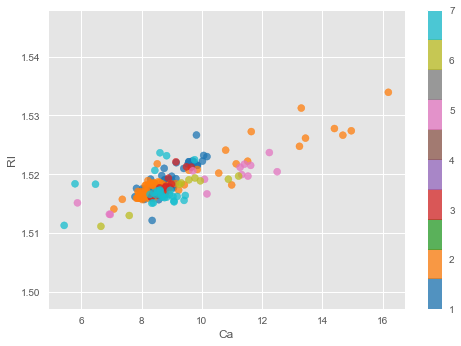

In [76]:
plt.style.use("ggplot")
plt.scatter(x=glass["Ca"],y=glass["RI"],marker='o',c=target,cmap='tab10', alpha = 0.75)
plt.xlabel("Ca")
plt.ylabel("RI")
plt.colorbar()
plt.show()

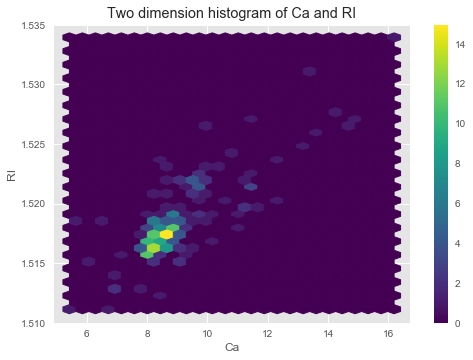

In [77]:
plt.hexbin(x=glass["Ca"],y=glass["RI"],gridsize=(25,20),cmap='viridis')
plt.colorbar()
plt.xlabel("Ca")
plt.ylabel("RI")
plt.title("Two dimension histogram of Ca and RI")
plt.show()

# Popular model with default hyper-parameters on all variables and all observation

In [334]:
def n_times_accuracy(classifier,n,dataset,target): #I will use this function in next part of analysis
    score=[]
    for i in np.arange(n):
        est = classifier() #It will working on all sklearn classifier
        score.append(np.mean(cross_val_score(estimator=est,cv=7,X=dataset,y=target)))
    return(np.mean(score))

score_rf = n_times_accuracy(RandomForestClassifier,30,glass,target)
score_svm = n_times_accuracy(SVC,30,glass,target)
score_tree = n_times_accuracy(DecisionTreeClassifier,30,glass,target)
score_kneighboor = n_times_accuracy(KNeighborsClassifier,30,glass,target)
score_log_reg = n_times_accuracy(LogisticRegression,30,glass,target)
score_xgb = n_times_accuracy(XGBClassifier,30,glass,target)

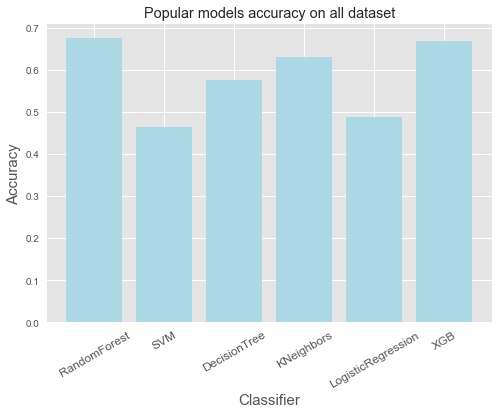

Maksimum accuracy is: 0.676004619101


In [335]:
scores = [score_rf,score_svm,score_tree,score_kneighboor,score_log_reg,score_xgb]
label = ["RandomForest","SVM","DecisionTree","KNeighbors","LogisticRegression","XGB"]
index = np.arange(len(label))

plt.style.use("ggplot")
plt.bar(index, scores, color = "lightblue")
plt.xlabel('Classifier', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(index, label, fontsize=12, rotation=30)
plt.title("Popular models accuracy on all dataset")
plt.show()

print("Maksimum accuracy is: " + str(max(scores)))

# PCA

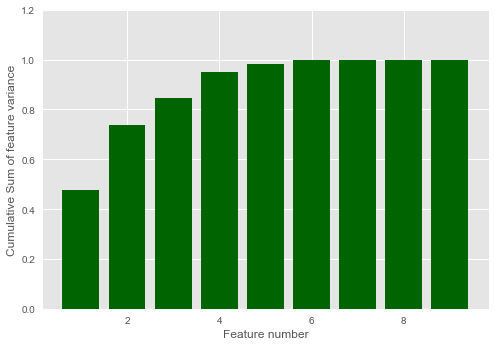

[ 0.47620525  0.73939801  0.84719844  0.94922308  0.98229031  0.99833805
  0.99976548  0.99999985  1.        ]
We will use first 5 features


In [111]:
PCA_transf = PCA(n_components=9)
glass_PCA = PCA_transf.fit_transform(glass)

sum_of_variance = np.cumsum(PCA_transf.explained_variance_ratio_)
index = np.arange(1,len(sum_of_variance)+1)

plt.bar(index,sum_of_variance,color = "darkgreen")
plt.ylim(bottom = 0, top = 1.2)
plt.xlabel("Feature number")
plt.ylabel("Cumulative Sum of feature variance")
plt.show()
print(sum_of_variance)
print("We will use first 5 features")

In [112]:
glass_PCA = pd.DataFrame(glass_PCA)
del glass_PCA[5]
del glass_PCA[6]
del glass_PCA[7]
del glass_PCA[8]
glass_PCA.head()

,0,1,2,3,4
0,-1.431425,-1.102115,-1.066958,-0.158237,0.143080
1,-1.436707,0.343585,-0.277824,-0.293937,-0.194434
2,-1.427322,0.345720,0.138708,-0.321984,0.023720
3,-1.257825,-0.249060,0.057742,0.022271,0.002472
4,-1.312466,-0.018405,0.357510,-0.278564,-0.071025


## Test our models on PCA

In [113]:
score_rf_PCA = n_times_accuracy(RandomForestClassifier,30,glass_PCA,target)
score_svm_PCA = n_times_accuracy(SVC,30,glass_PCA,target)
score_tree_PCA = n_times_accuracy(DecisionTreeClassifier,30,glass_PCA,target)
score_kneighboor_PCA = n_times_accuracy(KNeighborsClassifier,30,glass_PCA,target)
score_log_reg_PCA = n_times_accuracy(LogisticRegression,30,glass_PCA,target)
score_xgb_PCA = n_times_accuracy(XGBClassifier,30,glass_PCA,target)

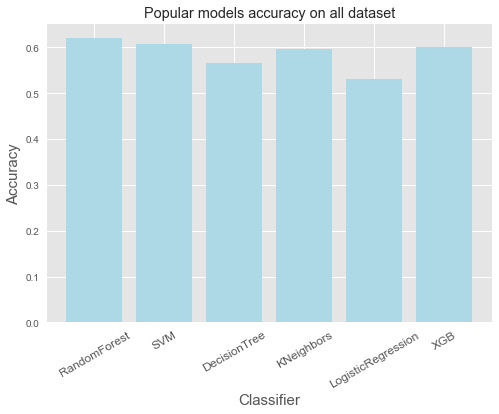

Maksimum accuracy is: 0.621287375899


In [329]:
scores_PCA = [score_rf_PCA,score_svm_PCA,score_tree_PCA,score_kneighboor_PCA,score_log_reg_PCA,score_xgb_PCA]
label = ["RandomForest","SVM","DecisionTree","KNeighbors","LogisticRegression","XGB"]
index = np.arange(len(label))

plt.style.use("ggplot")
plt.bar(index, scores_PCA, color = "lightblue")
plt.xlabel('Classifier', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(index, label, fontsize=12, rotation=30)
plt.title("Popular models accuracy on all dataset")
plt.show()

print("Maksimum accuracy is: " + str(max(scores_PCA)))

# Random Forest feature selection

In [115]:
feature_importance = np.array([0,0,0,0,0,0,0,0,0])
for i in np.arange(50):
    classifier = RandomForestClassifier()
    classifier.fit(glass,target)
    feature_importance = feature_importance + classifier.feature_importances_
feature_importance= feature_importance/50

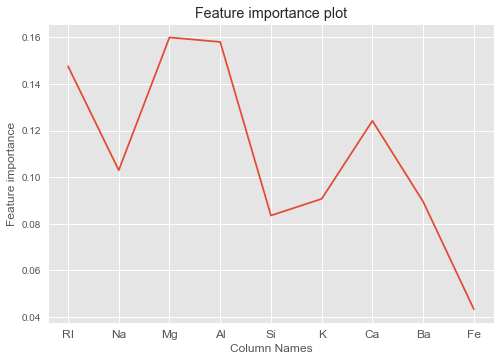

We try use only RI, MG, Al and Ca columns.


In [145]:
column_names = glass.columns
index = np.arange(len(column_names))

plt.style.use('ggplot')
plt.plot(feature_importance)
plt.xticks(index, column_names, fontsize=12)
plt.xlabel('Column Names')
plt.ylabel("Feature importance")
plt.title('Feature importance plot')
plt.show()

print("We try use only RI, MG, Al and Ca columns.")

In [321]:
glass_important_feature = pd.DataFrame({'RI':glass['RI'],'Na':glass['Na'],'Mg':glass['Mg'],'Al':glass['Al'],
                                        'K':glass['K'],'Ca':glass['Ca'],'Ba':glass['Ba']})
glass_important_feature.head()

,Al,Ba,Ca,K,Mg,Na,RI
0,0.252336,0.0,0.308550,0.009662,1.000000,0.437594,0.432836
1,0.333333,0.0,0.223048,0.077295,0.801782,0.475188,0.283582
2,0.389408,0.0,0.218401,0.062802,0.790646,0.421053,0.220808
3,0.311526,0.0,0.259294,0.091787,0.821826,0.372932,0.285777
4,0.295950,0.0,0.245353,0.088567,0.806236,0.381955,0.275241


## Test popular models

In [322]:
score_rf_IF = n_times_accuracy(RandomForestClassifier,30,glass_important_feature,target)
score_svm_IF = n_times_accuracy(SVC,30,glass_important_feature,target)
score_tree_IF = n_times_accuracy(DecisionTreeClassifier,30,glass_important_feature,target)
score_kneighboor_IF = n_times_accuracy(KNeighborsClassifier,30,glass_important_feature,target)
score_log_reg_IF = n_times_accuracy(LogisticRegression,30,glass_important_feature,target)
score_xgb_IF = n_times_accuracy(XGBClassifier,30,glass_important_feature,target)

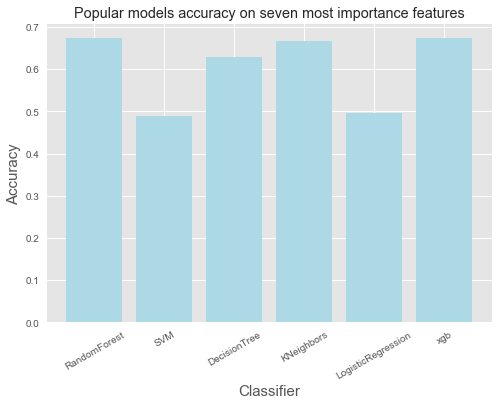

Maksimum accuracy is: 0.674293220221


In [328]:
scores_IF = [score_rf_IF,score_svm_IF,score_tree_IF,score_kneighboor_IF,score_log_reg_IF,score_xgb_IF]
label = ["RandomForest","SVM","DecisionTree","KNeighbors","LogisticRegression","xgb"]
index = np.arange(len(scores_IF))

plt.style.use("ggplot")
plt.bar(index, scores_IF, color = "lightblue")
plt.xlabel('Classifier', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(index,label, rotation = 30)
plt.title("Popular models accuracy on seven most importance features")
plt.show()
print("Maksimum accuracy is: " + str(max(scores_IF)))

## Min-Max transformation

In [181]:
def min_max(DF):
    for column in DF.columns:
        DF[column] = (DF[column] - np.min(DF[column]))/np.max(DF[column])
    return DF

In [182]:
glass_min_max = pd.DataFrame(min_max(glass))
print(np.max(glass))
print(glass_min_max.head())

RI    1.0
Na    1.0
Mg    1.0
Al    1.0
Si    1.0
K     1.0
Ca    1.0
Ba    1.0
Fe    1.0
dtype: float64
         RI        Na        Mg        Al        Si         K        Ca   Ba  \
0  0.432836  0.437594  1.000000  0.252336  0.351786  0.009662  0.308550  0.0   
1  0.283582  0.475188  0.801782  0.333333  0.521429  0.077295  0.223048  0.0   
2  0.220808  0.421053  0.790646  0.389408  0.567857  0.062802  0.218401  0.0   
3  0.285777  0.372932  0.821826  0.311526  0.500000  0.091787  0.259294  0.0   
4  0.275241  0.381955  0.806236  0.295950  0.583929  0.088567  0.245353  0.0   

    Fe  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  


In [183]:
score_rf_min_max = n_times_accuracy(RandomForestClassifier,30,glass_min_max,target)
score_svm_min_max = n_times_accuracy(SVC,30,glass_min_max,target)
score_tree_min_max = n_times_accuracy(DecisionTreeClassifier,30,glass_min_max,target)
score_kneighboor_min_max = n_times_accuracy(KNeighborsClassifier,30,glass_min_max,target)
score_log_reg_min_max = n_times_accuracy(LogisticRegression,30,glass_min_max,target)
score_xgb_min_max = n_times_accuracy(XGBClassifier,30,glass_min_max,target)

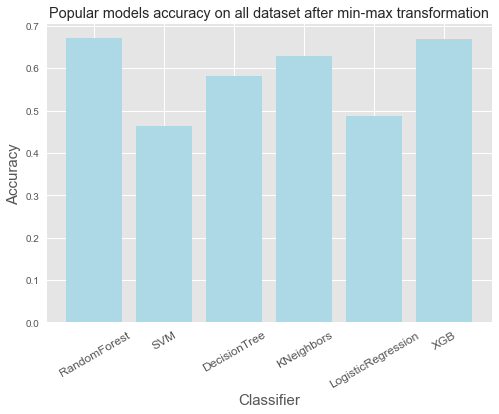

Maksimum accuracy is: 0.671999920203


In [327]:
scores = [score_rf_min_max,score_svm_min_max,score_tree_min_max,score_kneighboor_min_max,
          score_log_reg_min_max,score_xgb_min_max]
label = ["RandomForest","SVM","DecisionTree","KNeighbors","LogisticRegression","XGB"]
index = np.arange(len(label))

plt.style.use("ggplot")
plt.bar(index, scores, color = "lightblue")
plt.xlabel('Classifier', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(index, label, fontsize=12, rotation=30)
plt.title("Popular models accuracy on all dataset after min-max transformation")
plt.show()

print("Maksimum accuracy is: " + str(max(scores)))

#### Now we try use features selection and next tuning our best model

In [186]:
feature_importance_min_max = np.array([0,0,0,0,0,0,0,0,0])
for i in np.arange(50):
    classifier = RandomForestClassifier()
    classifier.fit(glass_min_max,target)
    feature_importance = feature_importance + classifier.feature_importances_
feature_importance= feature_importance/50

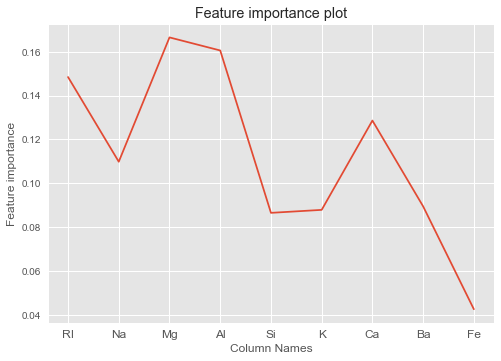

We try use only RI ,Na ,MG, Al and Ca columns.


In [336]:
column_names = glass_min_max.columns
index = np.arange(len(column_names))

plt.style.use('ggplot')
plt.plot(feature_importance)
plt.xticks(index, column_names, fontsize=12)
plt.xlabel('Column Names')
plt.ylabel("Feature importance")
plt.title('Feature importance plot')
plt.show()

print("We try use only RI ,Na ,MG, Al and Ca columns.")

In [191]:
glass_IF_min_max = pd.DataFrame({'RI':glass_min_max['RI'],'Na':glass_min_max['Na'],
                                 'Mg':glass_min_max['Mg'],'Al':glass_min_max['Al'],
                                 'Ca':glass_min_max['Ca']})
glass_IF_min_max.head()

,Al,Ca,Mg,Na,RI
0,0.252336,0.308550,1.000000,0.437594,0.432836
1,0.333333,0.223048,0.801782,0.475188,0.283582
2,0.389408,0.218401,0.790646,0.421053,0.220808
3,0.311526,0.259294,0.821826,0.372932,0.285777
4,0.295950,0.245353,0.806236,0.381955,0.275241


In [193]:
score_rf_IF_min_max = n_times_accuracy(RandomForestClassifier,30,glass_IF_min_max,target)
score_svm_IF_min_max = n_times_accuracy(SVC,30,glass_IF_min_max,target)
score_tree_IF_min_max = n_times_accuracy(DecisionTreeClassifier,30,glass_IF_min_max,target)
score_kneighboor_IF_min_max = n_times_accuracy(KNeighborsClassifier,30,glass_IF_min_max,target)
score_log_reg_IF_min_max = n_times_accuracy(LogisticRegression,30,glass_IF_min_max,target)
score_xgb_IF_min_max = n_times_accuracy(XGBClassifier,30,glass_IF_min_max,target)

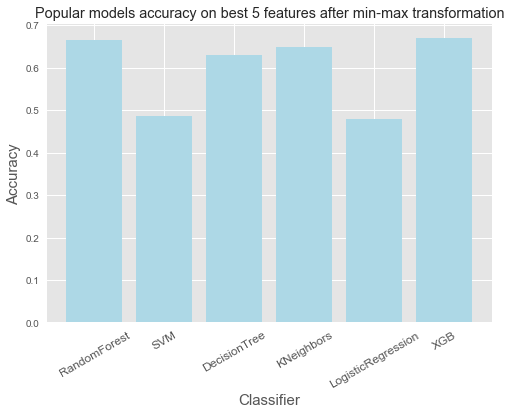

Maksimum accuracy is: 0.670191338999


In [326]:
scores_IF_min_max = [score_rf_IF_min_max,score_svm_IF_min_max,score_tree_IF_min_max,score_kneighboor_IF_min_max
                     ,score_log_reg_IF_min_max,score_xgb_IF_min_max]
label = ["RandomForest","SVM","DecisionTree","KNeighbors","LogisticRegression","XGB"]
index = np.arange(len(label))

plt.style.use("ggplot")
plt.bar(index, scores_IF_min_max, color = "lightblue")
plt.xlabel('Classifier', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(index, label, fontsize=12, rotation=30)
plt.title("Popular models accuracy on best 5 features after min-max transformation")
plt.show()

print("Maksimum accuracy is: " + str(max(scores_IF_min_max)))

### Tune parameters, we will tune 3 models (on min-max dataset ): Random Forest, K-Neighboors and XGB.

## Test train split

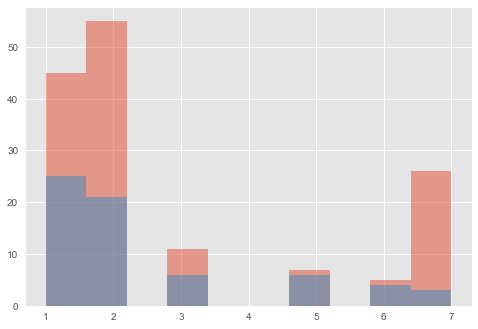

In [200]:
X_train, X_test, y_train, y_test = train_test_split(glass_min_max,target,test_size = 0.3)
plt.style.use("ggplot")
plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

1) Random Forest

In [295]:
parameters = {"criterion":["gini","entropy"],
             "n_estimators":[100,250,500],
             "max_depth" : [4,6,8,10],
             "max_features":["auto",2]}

In [296]:
rf = RandomForestClassifier()
SearchParameters_rf = GridSearchCV(rf,parameters,cv=5,scoring="accuracy")
SearchParameters_rf.fit(X_train,y_train)
SearchParameters_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [297]:
tune_rf_score = accuracy_score(SearchParameters_rf.predict(X_test),y_test)

In [298]:
print(tune_rf_score)

0.753846153846


2) K-Neighboors

In [286]:
parameters ={"metric":["euclidean",'chebyshev'],
            "n_neighbors": [1,3,5,7],
            "weights": ['uniform',"distance"],
            "p":[1,2,3,4,5]}

In [287]:
KN = KNeighborsClassifier()
SearchParameters_KN = GridSearchCV(KN,parameters,cv=5,scoring="accuracy")
SearchParameters_KN.fit(X_train,y_train)
SearchParameters_KN.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=1, p=1,
           weights='uniform')

In [288]:
tune_KN_score = accuracy_score(SearchParameters_KN.predict(X_test),y_test)
print(tune_KN_score)

0.661538461538


3) XGB

In [311]:
parameters = {"n_estimators":[100,250,500],
              "gamma":[0,1,3,5],
              "max_depth": [4,6,8,10],
              "learning_rate": [0.1,0.2,0.3]
             }

In [312]:
XGB = XGBClassifier()
SearchParameters_XG = GridSearchCV(XGB,parameters, cv=5,scoring="accuracy")
SearchParameters_XG.fit(X_train,y_train)
SearchParameters_XG.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [313]:
tune_XGB_score = accuracy_score(SearchParameters_XG.predict(X_test),y_test)
print(tune_XGB_score)

0.769230769231


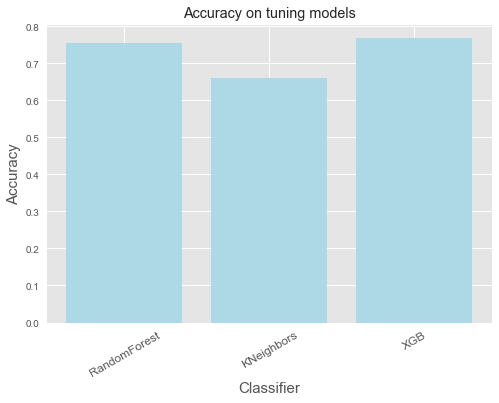

In [325]:
scores_tune = [tune_rf_score, tune_KN_score, tune_XGB_score]
label = ["RandomForest","KNeighbors","XGB"]
index = np.arange(len(label))


plt.style.use("ggplot")
plt.bar(index,scores_tune, color="lightblue")
plt.xticks(index,label, rotation = 30, fontsize=12)
plt.xlabel("Classifier", fontsize = 15)
plt.ylabel("Accuracy", fontsize=15)
plt.title("Accuracy on tuning models")
plt.show()